# サイクロイドのアニメーション作成

In [1]:
%%ai_ask
jupyterのpythonでサイクロイドを描画するアニメーションを作りたい

以下の手順でサイクロイドを描画するアニメーションを作成できます。

1. 必要なライブラリをインポートします。

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
```

2. サイクロイドの式を定義します。

```python
def cycloid(t, r):
    x = r * (t - np.sin(t))
    y = r * (1 - np.cos(t))
    return x, y
```

3. アニメーションのフレームを作成する関数を定義します。

```python
def animate(i):
    t = np.linspace(0, 4 * np.pi, 1000)
    x, y = cycloid(t + i * 0.1, 1)
    line.set_data(x, y)
    return line,
```

4. アニメーションを描画します。

```python
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_aspect('equal')
ax.set_xlim(-5, 25)
ax.set_ylim(-5, 5)
ani = FuncAnimation(fig, animate, frames=100, interval=50)
plt.show()
```

これで、サイクロイドを描画するアニメーションが作成されます。`r`の値を変更することで、サイクロイドの大きさを調整できます。また、`interval`の値を変更することで、アニメーションの速度を調整できます。

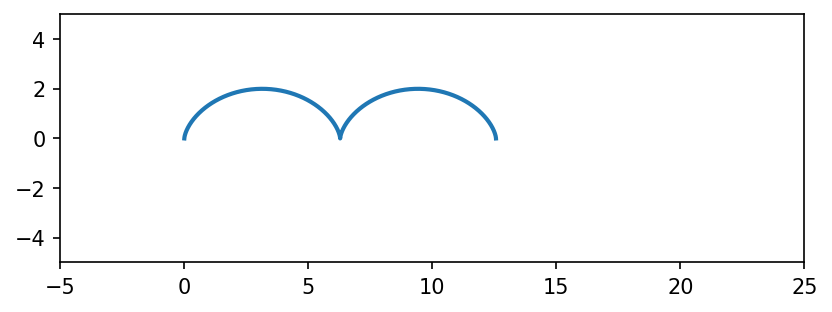

In [1]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation

def cycloid(t, r):
    x = r * (t - np.sin(t))
    y = r * (1 - np.cos(t))
    return x, y

def animate(i):
    t = np.linspace(0, 4 * np.pi, 1000)
    x, y = cycloid(t + i * 0.1, 1)
    line.set_data(x, y)
    return line,

#fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_aspect('equal')
ax.set_xlim(-5, 25)
ax.set_ylim(-5, 5)
FuncAnimation(fig, animate, frames=100, interval=50)

## ニュートンがケプラーの第二法則を証明したサイクロイド

* [Python Matplotlib Tips: Draw cycloid animation using matplotlib.animation.ArtistAnimation](https://pythonmatplotlibtips.blogspot.com/2017/12/cycloid-animation-artistanimation.html)
* [[matplotlib animation] 13. サイクロイド(cycloid) – サボテンパイソン](https://sabopy.com/py/matplotlib-animation-13/)

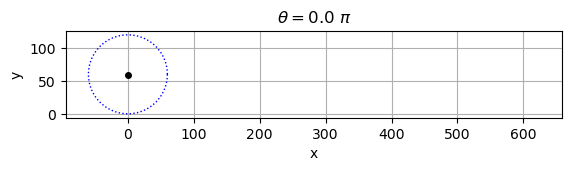

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

def update(num):
    if len(round_circles) > 0:
        round_circles.pop().remove()
        round_circles2.pop().remove()
        cycloids.pop().remove()
        points.pop().remove()
        
    round_circle,  = plt.plot(cycloid_c[num]+x,  R+y,  'b:', lw=1)
    round_circle2, = plt.plot(cycloid_c[num]+x2, R+y2, 'b-', lw=1)
    cycloid, = plt.plot(cycloid_x[:num+1] ,cycloid_y[:num+1], 'r-', lw=1)
    point, = plt.plot(cycloid_x[num], cycloid_y[num], 'ko', markersize=4)
    
    round_circles.append(round_circle)
    round_circles2.append(round_circle2)
    cycloids.append(cycloid)
    points.append(point)
    
    theta_str = r'$\theta=$'
    ax.set_title(theta_str + str(theta[num]/np.pi)[:4] + str(r' $\pi$'))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

#plot data
e = 0.0167 # earth
#e = 0.0935 # mars
#e = 0.9673 # 1P/Halley
#e=0.6
a = 1
b = np.sqrt(a**2-e**2)
R = a/e
theta = np.linspace(0,3*np.pi,200)
phi   = np.linspace(0,2*np.pi,100)

x = R*np.cos(phi)
y = R*np.sin(phi)
round_circles =[]

x2 = R*np.cos(phi)*e
y2 = R*np.sin(phi)*e
round_circles2 =[]

cycloid_x = R*e*(1/e*theta-np.sin(theta))
cycloid_y = R*(1-np.cos(theta)*e)
cycloids=[]

cycloid_c = R*theta
points=[]

ani = animation.FuncAnimation(fig, update, 200, interval=100)
HTML(ani.to_html5_video())